In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

### Performing Exploratory data analysis to gain insights on data.

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['Species'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
iris_df.shape

(150, 5)

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


#### There is no any null entry in the dataset :)

In [6]:
iris_df.iloc[:,0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### Evaluating relationship between features based on species 

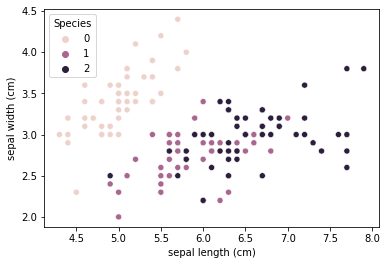

In [7]:
sns.scatterplot(data=iris_df,x='sepal length (cm)', y ='sepal width (cm)', hue='Species')
plt.show()

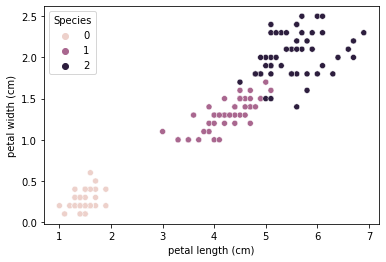

In [8]:
sns.scatterplot(data=iris_df,x='petal length (cm)', y ='petal width (cm)', hue='Species')
plt.show()

#### Count Species 

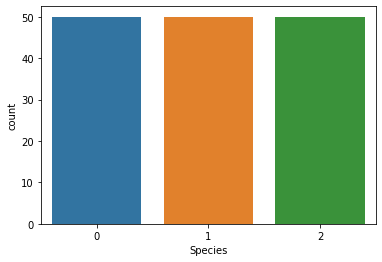

In [9]:
sns.countplot(data=iris_df, x='Species')
plt.show()

#### Finding optimal numbers of clusters using elbow method

In [10]:
x = iris_df.iloc[:,:4]
k_values = []
intertia_scores = []

for k in range(2,15):
    model = KMeans(n_clusters=k)
    model.fit(x)
    intertia_scores.append(model.inertia_)
    k_values.append(k)

module_of_second_derivative = np.abs(np.diff(np.diff(intertia_scores)))

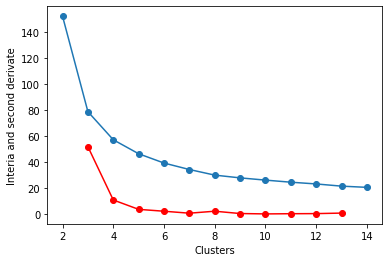

In [11]:
plt.plot(k_values, intertia_scores)
plt.scatter(k_values, intertia_scores)
plt.plot(k_values[1:-1], module_of_second_derivative, color='red')
plt.scatter(k_values[1:-1], module_of_second_derivative, color='red')
plt.xlabel("Clusters")
plt.ylabel("Interia and second derivate")
plt.show()

#### Elbow point can be seen at value = 3

### Training the model on 4 features using Kmeans clustering with optimal clusters k = 3

In [12]:
model = KMeans(n_clusters=3, n_init=1, max_iter=100)
model.fit(x)

all_predictions = model.predict(x)
centroids = model.cluster_centers_
centroids

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

### Reducing dataset with 2 features 

In [13]:
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

x_reduced.shape

(150, 2)

### Training model on reduced dataset having 2 features

In [14]:
model_2 = KMeans(n_clusters=3, n_init=1, max_iter=100)
model_2.fit(x_reduced)

all_predictions_2 = model_2.predict(x_reduced)
centroids_2 = model_2.cluster_centers_
centroids_2

array([[-2.64241546,  0.19088505],
       [ 2.34652659,  0.27393856],
       [ 0.66567601, -0.3316042 ]])

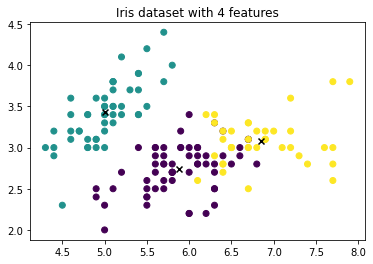

In [16]:
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=all_predictions)
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color="black")
plt.title("Iris dataset with 4 features")
plt.show()

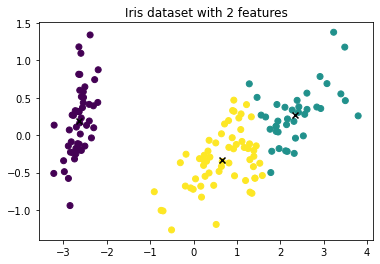

In [17]:
plt.scatter(x_reduced[:,0], x_reduced[:,1], c=all_predictions_2)
plt.scatter(centroids_2[:,0], centroids_2[:,1], marker='x', color="black")
plt.title("Iris dataset with 2 features")
plt.show()

### Results can be seen in graphs, we have got pretty good results with reduced dataset.